In [1]:
import pandas as pd              
import matplotlib.pyplot as plt  
import numpy as np                
import seaborn as sns
import statsmodels.api as sm


In [2]:
data_Media = pd.read_csv('/Users/ganzhongyu/Desktop/Media Investment.csv')
data_customer_location = pd.read_csv('/Users/ganzhongyu/Desktop/Sales by customer location train.csv')
data_store_location = pd.read_csv('/Users/ganzhongyu/Desktop/Sales by store location.csv')

In [3]:
print('data_Media_info')                    
print(data_Media.info())
print('\n')  
print('data_customer_location_info')                    
print(data_customer_location.info(show_counts=False))
print('\n') 
print('data_store_location_info')                    
print(data_store_location.info())


data_Media_info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   week_ending         948 non-null    object 
 1   state               948 non-null    object 
 2   media_amount_spend  948 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.3+ KB
None


data_customer_location_info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827592 entries, 0 to 1827591
Data columns (total 11 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   store_id                       object 
 1   sales_channel                  object 
 2   customer_state                 object 
 3   customer_postcode              float64
 4   price_lifestage_segment        object 
 5   customer_count                 int64  
 6   transaction_count              int64  
 7   total_sale_value               fl

In [4]:
print('data_Media_null')                    
print(data_Media.isnull().sum())
print('\n')  
print('data_customer_location_null')                    
print(data_customer_location.isnull().sum())
print('\n') 
print('data_store_location_null')                    
print(data_store_location.isnull().sum())

data_Media_null
week_ending           0
state                 0
media_amount_spend    0
dtype: int64


data_customer_location_null
store_id                             0
sales_channel                        0
customer_state                       0
customer_postcode                    7
price_lifestage_segment          13565
customer_count                       0
transaction_count                    0
total_sale_value                     0
total_sale_value_ex_gst              0
total_promotional_sales_value        0
financial_week_end_date              0
dtype: int64


data_store_location_null
store_id                          0
store_state                       0
store_postcode                    0
store_latitude                    0
store_longitude                   0
co_location_flag                 11
sales_channel                     0
distance_to_kmart                 1
distance_to_target                1
total_sale_value                  0
total_sale_value_ex_gst           0
tota

In [5]:
mode_price_lifestage_segment = data_customer_location['price_lifestage_segment'].mode()[0]
data_customer_location['price_lifestage_segment'].fillna(mode_price_lifestage_segment, inplace=True)

data_customer_location.dropna(subset=['customer_postcode'], inplace=True)
grouped = data_customer_location.groupby('price_lifestage_segment')['total_sale_value'].sum().sort_values(ascending=False)

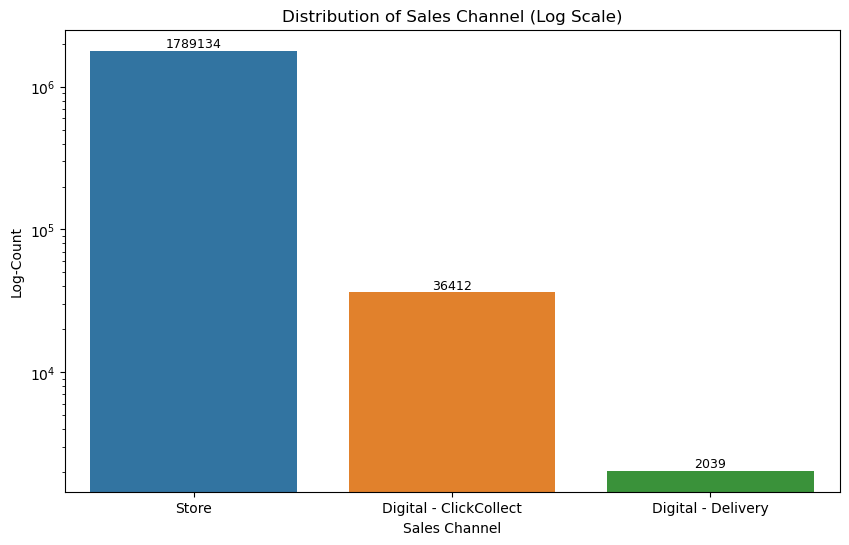

In [6]:
sales_channel_counts = data_customer_location['sales_channel'].value_counts()
customer_state_counts = data_customer_location['customer_state'].value_counts()

plt.figure(figsize=(10,6))
ax1 = sns.countplot(data=data_customer_location, x='sales_channel')
plt.yscale("log")
plt.title('Distribution of Sales Channel (Log Scale)')
plt.ylabel('Log-Count')
plt.xlabel('Sales Channel')

for i, v in enumerate(sales_channel_counts):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=9)
    
plt.savefig('1.jpg')


In [7]:
#co_flag是分类数据，通常用众数填充
mode_colocation = data_store_location['co_location_flag'].mode()[0]
data_store_location['co_location_flag'].fillna(mode_colocation, inplace=True)
data_store_location.dropna(subset=['distance_to_kmart'], inplace=True)
data_store_location.dropna(subset=['distance_to_target'], inplace=True)

In [8]:
print('Data_Media\'s duplicate rows')
duplicate_data_Media = data_Media[data_Media.duplicated()]

print(f"Number of data_Media duplicate rows = {duplicate_data_Media.shape[0]}")

Data_Media's duplicate rows
Number of data_Media duplicate rows = 0


In [9]:
print('data_customer_location\'s duplicate rows')
duplicate_data_customer_location = data_customer_location[data_customer_location.duplicated()]

print(f"Number of data_Media duplicate rows = {duplicate_data_customer_location.shape[0]}")

data_customer_location's duplicate rows
Number of data_Media duplicate rows = 0


In [10]:
print('data_customer_location\'s duplicate rows')
duplicate_data_store_location = data_store_location[data_store_location.duplicated()]

print(f"Number of data_Media duplicate rows = {duplicate_data_store_location.shape[0]}")

data_customer_location's duplicate rows
Number of data_Media duplicate rows = 0


In [11]:
Q1_media_amount_spend = data_Media['media_amount_spend'].quantile(0.25)
Q3_media_amount_spend = data_Media['media_amount_spend'].quantile(0.75)
IQR_media_amount_spend = Q3_media_amount_spend - Q1_media_amount_spend

filter = (data_Media['media_amount_spend'] < (Q1_media_amount_spend - 1.5 * IQR_media_amount_spend)) | (data_Media['media_amount_spend'] > (Q3_media_amount_spend + 1.5 * IQR_media_amount_spend))
outliers_media_amount_spend = data_Media[filter]

print(outliers_media_amount_spend)

    week_ending     state  media_amount_spend
110   6/11/2022        SA        8.591716e+05
116   1/05/2022        SA        5.139351e+05
133   6/06/2021        SA        4.949916e+05
144   5/12/2021        SA        5.761033e+05
152   2/10/2022        SA        5.872647e+05
..          ...       ...                 ...
943   1/01/2023  National        9.323000e+06
944   4/07/2021  National        4.810000e+06
945   3/10/2021  National        9.185000e+06
946   5/12/2021  National        6.429000e+06
947   6/11/2022  National        1.840900e+07

[124 rows x 3 columns]


In [12]:
from scipy.stats import zscore

z_scores = zscore(data_customer_location['total_sale_value'])
abs_z_scores = np.abs(z_scores)

outliers = data_customer_location[abs_z_scores > 3]  # 通常，大于3的z分数被认为是异常值
print(outliers)

                                 store_id sales_channel customer_state  \
57       cf17919db51b07c8187d2f9531f1fb9e         Store            VIC   
88       dad2fd502d209b12ac27f451b0b9c17e         Store            NSW   
90       755e9e9053939dbd61e36d0d32a7e646         Store            QLD   
184      21263296b783b2bff8ce23b30feadb7a         Store            NSW   
191      6deaa90ea76ff91937766e94f28bd457         Store            QLD   
...                                   ...           ...            ...   
1827243  cd9e5fd837de37a31685fc9ed5d7f166         Store            NSW   
1827295  ed5fc9493b475813203e1c2497a11f6f         Store            NSW   
1827383  e3f2f5905b9fddcab2fd91cec78a449f         Store            QLD   
1827536  1fee9df4bbb1d3a21fbfd782076eb3f1         Store            TAS   
1827550  42812b616b70a5494393685d9efcf93e         Store            NSW   

         customer_postcode           price_lifestage_segment  customer_count  \
57                  3629.0     

In [13]:
from scipy.stats import zscore

z_scores = zscore(data_customer_location['total_sale_value_ex_gst'])
abs_z_scores = np.abs(z_scores)

outliers = data_customer_location[abs_z_scores > 3]  # 通常，大于3的z分数被认为是异常值
print(outliers)

                                 store_id sales_channel customer_state  \
57       cf17919db51b07c8187d2f9531f1fb9e         Store            VIC   
88       dad2fd502d209b12ac27f451b0b9c17e         Store            NSW   
90       755e9e9053939dbd61e36d0d32a7e646         Store            QLD   
184      21263296b783b2bff8ce23b30feadb7a         Store            NSW   
191      6deaa90ea76ff91937766e94f28bd457         Store            QLD   
...                                   ...           ...            ...   
1827243  cd9e5fd837de37a31685fc9ed5d7f166         Store            NSW   
1827295  ed5fc9493b475813203e1c2497a11f6f         Store            NSW   
1827383  e3f2f5905b9fddcab2fd91cec78a449f         Store            QLD   
1827536  1fee9df4bbb1d3a21fbfd782076eb3f1         Store            TAS   
1827550  42812b616b70a5494393685d9efcf93e         Store            NSW   

         customer_postcode           price_lifestage_segment  customer_count  \
57                  3629.0     

In [28]:
from scipy.stats import zscore

z_scores = zscore(data_customer_location['total_promotional_sales_value'])
abs_z_scores = np.abs(z_scores)

outliers = data_customer_location[abs_z_scores > 3]  # 通常，大于3的z分数被认为是异常值
print(outliers)

Empty DataFrame
Columns: [store_id, sales_channel, customer_state, customer_postcode, price_lifestage_segment, customer_count, transaction_count, total_sale_value, total_sale_value_ex_gst, total_promotional_sales_value, financial_week_end_date]
Index: []


In [38]:
data_customer_location.describe()

,customer_postcode,customer_count,transaction_count,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value
count,1.827585e+06,1.827585e+06,1.827585e+06,1.827585e+06,1.827584e+06,1.827517e+06
mean,3.843125e+03,2.392947e+01,2.996425e+01,1.679058e+03,1.532896e+03,2.573551e+02
std,1.391394e+03,3.388238e+01,4.551568e+01,2.806585e+03,2.565411e+03,4.966725e+02
min,8.000000e+02,6.000000e+00,6.000000e+00,3.650000e+00,3.620000e+00,0.000000e+00
25%,2.574000e+03,8.000000e+00,9.000000e+00,4.744300e+02,4.324100e+02,5.280000e+01
50%,3.976000e+03,1.200000e+01,1.500000e+01,8.447000e+02,7.704400e+02,1.173200e+02
75%,4.817000e+03,2.500000e+01,3.000000e+01,1.706400e+03,1.557740e+03,2.643400e+02
max,9.726000e+03,7.910000e+02,1.307000e+03,1.192247e+05,1.093769e+05,5.040995e+04


In [30]:

negative_sales_count = (data_customer_location['total_promotional_sales_value'] < 0).sum()
print(negative_sales_count)
negative_sales_count1 = (data_customer_location['total_sale_value_ex_gst'] < 0).sum()
print(negative_sales_count1)
data_customer_location[data_customer_location.select_dtypes(include=[np.number]) < 0] = np.nan
data_customer_location.describe()

0
0


,customer_postcode,customer_count,transaction_count,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value
count,1.827585e+06,1.827585e+06,1.827585e+06,1.827585e+06,1.827584e+06,1.827517e+06
mean,3.843125e+03,2.392947e+01,2.996425e+01,1.679058e+03,1.532896e+03,2.573551e+02
std,1.391394e+03,3.388238e+01,4.551568e+01,2.806585e+03,2.565411e+03,4.966725e+02
min,8.000000e+02,6.000000e+00,6.000000e+00,3.650000e+00,3.620000e+00,0.000000e+00
25%,2.574000e+03,8.000000e+00,9.000000e+00,4.744300e+02,4.324100e+02,5.280000e+01
50%,3.976000e+03,1.200000e+01,1.500000e+01,8.447000e+02,7.704400e+02,1.173200e+02
75%,4.817000e+03,2.500000e+01,3.000000e+01,1.706400e+03,1.557740e+03,2.643400e+02
max,9.726000e+03,7.910000e+02,1.307000e+03,1.192247e+05,1.093769e+05,5.040995e+04


In [31]:
data_store_location.describe()

,store_postcode,store_latitude,store_longitude,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value
count,424.000000,424.000000,424.000000,4.240000e+02,4.240000e+02,4.240000e+02
mean,3723.941038,-32.143791,145.458445,2.372898e+07,2.165377e+07,2.936433e+06
std,1373.762478,5.215279,10.492336,2.457178e+07,2.243606e+07,3.552975e+06
min,810.000000,-42.975900,115.658500,2.832891e+04,2.576402e+04,2.406400e+02
25%,2502.000000,-35.116875,144.777200,2.981000e+06,2.711634e+06,2.976463e+04
50%,3429.000000,-33.691700,150.309900,6.333912e+06,5.762049e+06,6.093800e+04
75%,4672.500000,-28.080500,151.674400,4.898502e+07,4.471986e+07,6.664272e+06
max,7050.000000,-12.377500,153.564400,8.571700e+07,7.825479e+07,1.020992e+07


In [32]:
data_Media.describe()

,media_amount_spend
count,9.480000e+02
mean,4.927840e+05
std,1.542361e+06
min,0.000000e+00
25%,8.561838e+03
50%,4.637372e+04
75%,2.003745e+05
max,1.840900e+07


<Figure size 4000x2000 with 0 Axes>

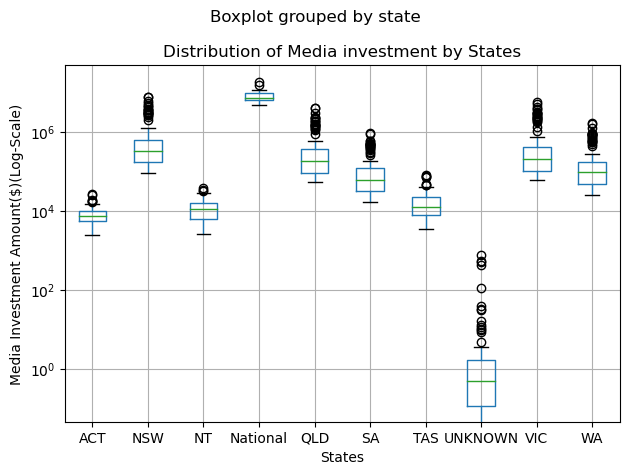

In [33]:
plt.figure(figsize=(40,20))
data_Media.boxplot(column='media_amount_spend',by = 'state')
plt.title('Distribution of Media investment by States')
plt.xlabel('States')
plt.ylabel('Media Investment Amount($)(Log-Scale)')
plt.yscale("log")
plt.tight_layout()
plt.savefig('2.pdf')


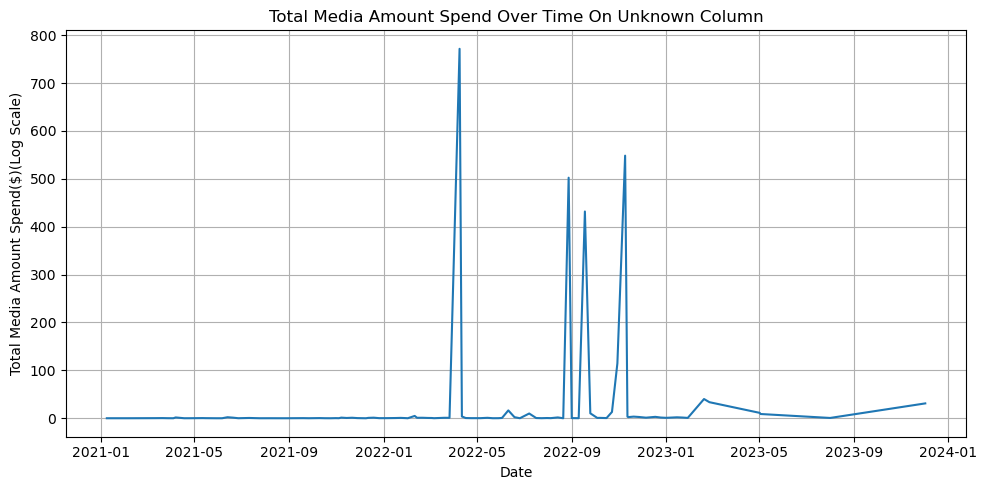

In [34]:
data_Media['week_ending'] = pd.to_datetime(data_Media['week_ending'])
data_National = data_Media[data_Media['state'] == 'UNKNOWN']
grouped = data_National.groupby('week_ending').agg({'media_amount_spend': 'sum'}).reset_index()
grouped_sorted = grouped.sort_values(by='week_ending')

plt.figure(figsize=(10,5))
plt.plot(grouped_sorted['week_ending'], grouped_sorted['media_amount_spend'])
plt.title('Total Media Amount Spend Over Time On Unknown Column')
plt.xlabel('Date')
plt.ylabel('Total Media Amount Spend($)(Log Scale)')
plt.grid(True)
plt.tight_layout()
plt.savefig('3.pdf')

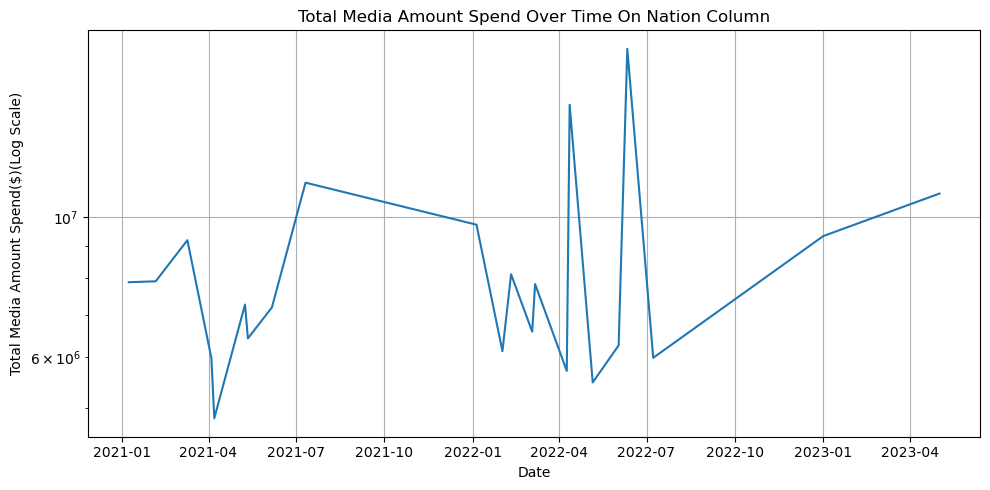

In [35]:
data_Media['week_ending'] = pd.to_datetime(data_Media['week_ending'])
data_National = data_Media[data_Media['state'] == 'National']
grouped = data_National.groupby('week_ending').agg({'media_amount_spend': 'sum'}).reset_index()
grouped_sorted = grouped.sort_values(by='week_ending')

plt.figure(figsize=(10,5))
plt.plot(grouped_sorted['week_ending'], grouped_sorted['media_amount_spend'])
plt.title('Total Media Amount Spend Over Time On Nation Column')
plt.xlabel('Date')
plt.ylabel('Total Media Amount Spend($)(Log Scale)')
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.savefig('4.pdf')

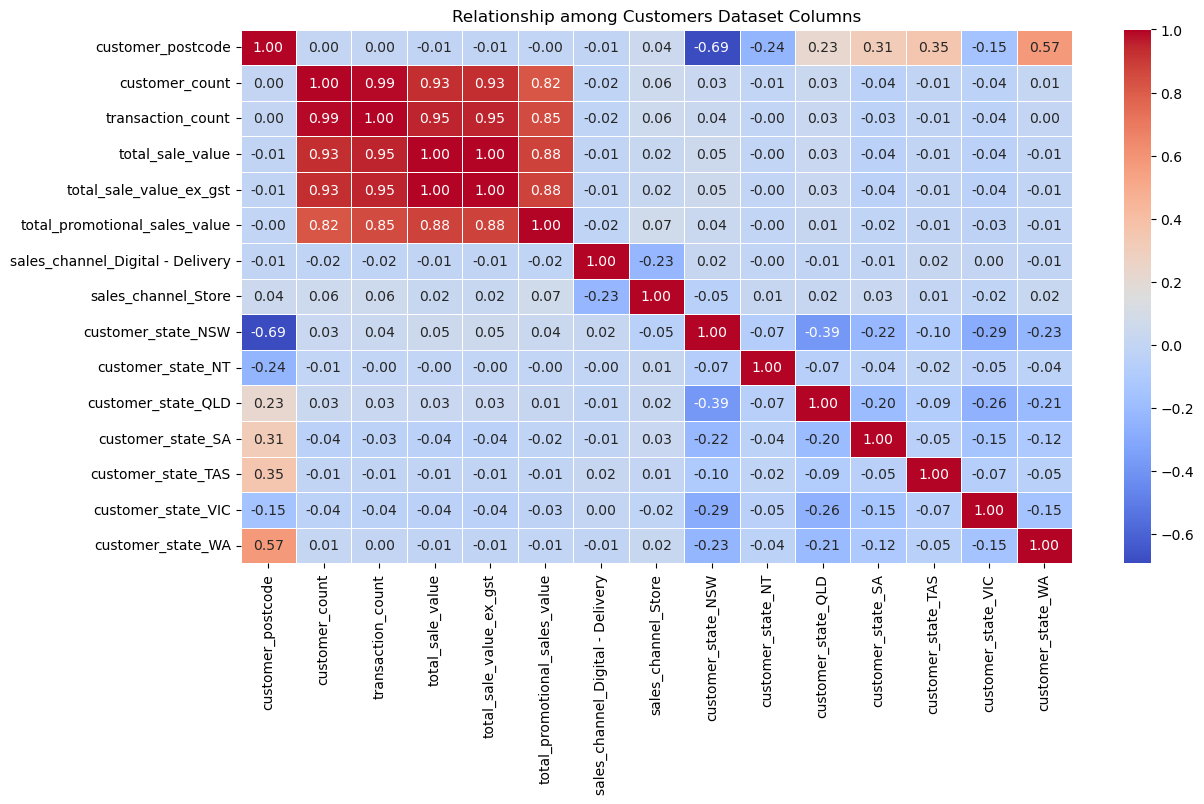

In [36]:
dummies = pd.get_dummies(data_customer_location, columns=['sales_channel', 'customer_state'], drop_first=True)
correlation_matrix = dummies.corr()
plt.figure(figsize=(13, 8))

sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)

plt.tight_layout()
plt.title('Relationship among Customers Dataset Columns')
plt.savefig('5.pdf')
# print(correlation_matrix)

# correlation_with_target = correlation_matrix['total_sale_value'].sort_values(ascending=False)


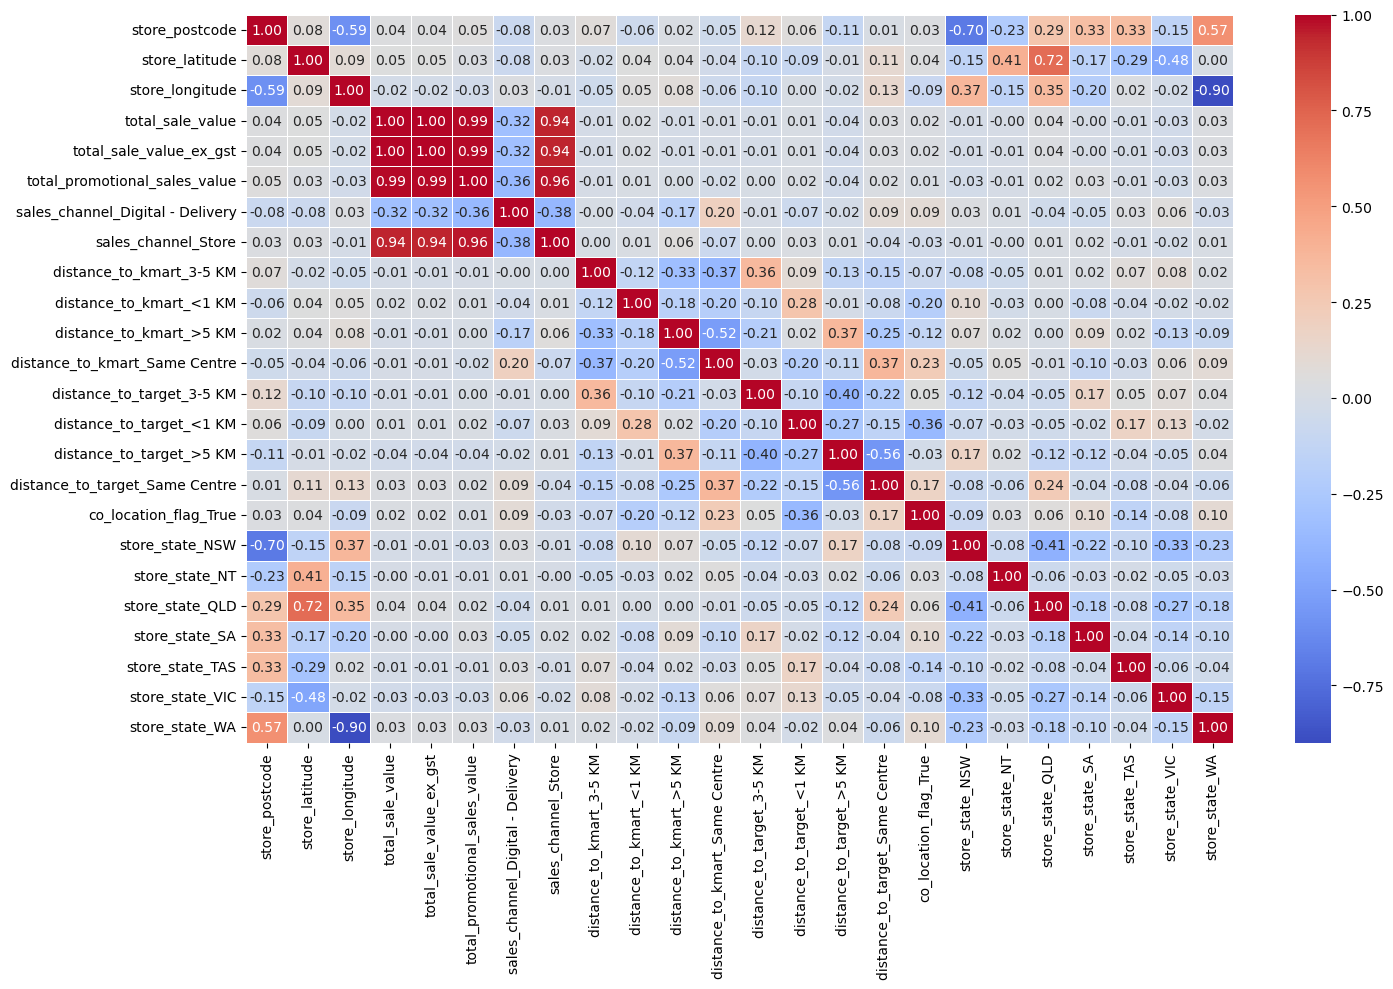

In [37]:
dummies1 = pd.get_dummies(data_store_location, columns=['sales_channel','distance_to_kmart','distance_to_target','co_location_flag','store_state'], drop_first=True)
correlation_matrix1 = dummies1.corr()
# print(correlation_matrix1)
plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix1, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)

plt.tight_layout()

plt.show()
# correlation_with_target1 = correlation_matrix1['total_sale_value'].sort_values(ascending=False)
# print(correlation_with_target1)

In [24]:
data_Media_dummies = pd.get_dummies(data_Media, columns=['state'], drop_first=True)
data_Media_dummies.corr()['media_amount_spend'].sort_values(ascending=False)

media_amount_spend    1.000000
state_National        0.797111
state_NSW             0.120320
state_VIC             0.054815
state_QLD             0.005036
state_WA             -0.058705
state_SA             -0.079852
state_TAS            -0.107667
state_NT             -0.108905
state_UNKNOWN        -0.110381
Name: media_amount_spend, dtype: float64

                            store_id  total_sale_value
79  80d61f4c7a1a889090a7bdac32485de8       36213667.03


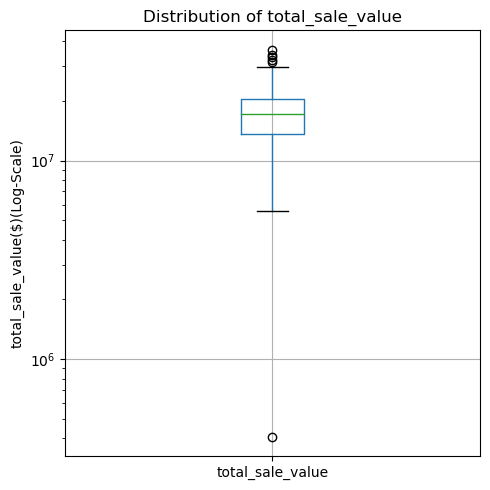

In [27]:
grouped_sales = data_customer_location.groupby('store_id').agg({'total_sale_value': 'sum'}).reset_index()
plt.figure(figsize=(5,5))
grouped_sales.boxplot(column='total_sale_value')
plt.title('Distribution of total_sale_value')
plt.xlabel('')
plt.ylabel('total_sale_value($)(Log-Scale)')
plt.yscale("log")
plt.tight_layout()
plt.savefig('6.pdf')
from scipy.stats import zscore

z_scores = zscore(grouped_sales['total_sale_value'])
abs_z_scores = np.abs(z_scores)

outliers = grouped_sales[abs_z_scores > 3]  # 通常，大于3的z分数被认为是异常值
print(outliers)

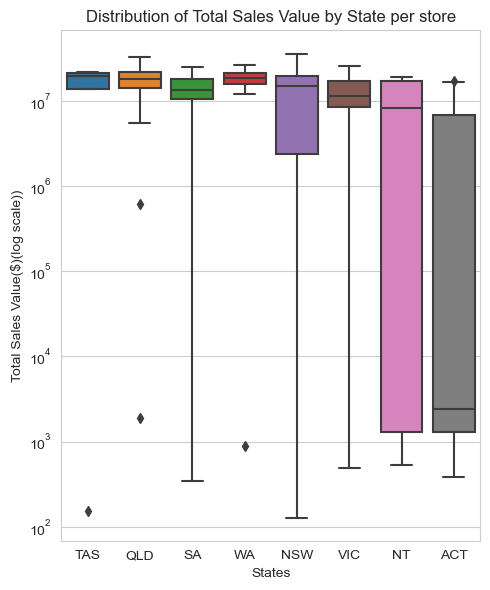

In [48]:
grouped_sales = data_customer_location.groupby(['store_id', 'customer_state']).agg({'total_sale_value': 'sum'}).reset_index()

plt.figure(figsize=(5,6))
sns.boxplot(data=grouped_sales, x='customer_state', y='total_sale_value')
plt.title('Distribution of Total Sales Value by State per store')
plt.xlabel('States')
plt.ylabel('Total Sales Value($)(log scale))')
plt.yscale("log")
plt.tight_layout()
plt.savefig('71.pdf')

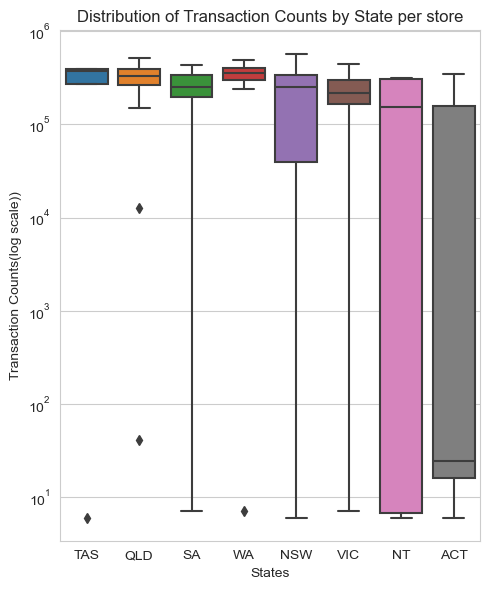

In [49]:
grouped_sales = data_customer_location.groupby(['store_id', 'customer_state']).agg({'transaction_count': 'sum'}).reset_index()

plt.figure(figsize=(5,6))
sns.boxplot(data=grouped_sales, x='customer_state', y='transaction_count')
plt.title('Distribution of Transaction Counts by State per store')
plt.xlabel('States')
plt.ylabel('Transaction Counts(log scale))')
plt.yscale("log")
plt.tight_layout()
plt.savefig('7.pdf')

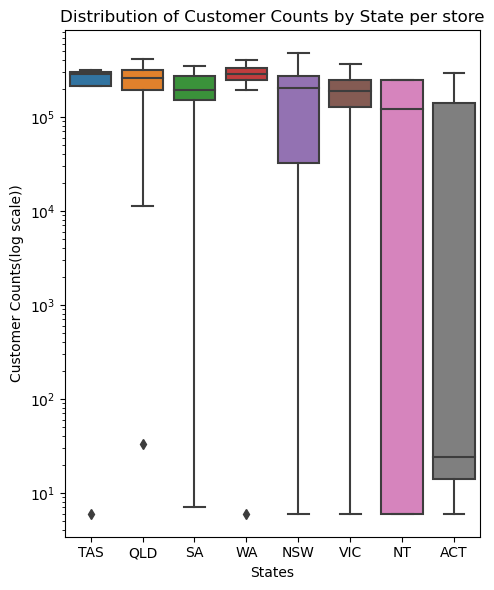

In [29]:
grouped_customers = data_customer_location.groupby(['store_id', 'customer_state']).agg({'customer_count': 'sum'}).reset_index()

plt.figure(figsize=(5,6))
sns.boxplot(data=grouped_customers, x='customer_state', y='customer_count')
plt.title('Distribution of Customer Counts by State per store')
plt.xlabel('States')
plt.ylabel('Customer Counts(log scale))')
plt.yscale("log")
plt.tight_layout()
plt.savefig('8.pdf')

                             store_id customer_state  transaction_count
0    00f80c0962fb37ea8fb72accc75546c8            TAS             388127
1    00fdea78e677259a3e44868468f24bbf            QLD             355464
2    03d9b714d7ac602a9755a662c1d65be4            QLD             497596
3    059fffb74fa5f6ebe37bd1df479c02f7            QLD             263530
4    05c3e372f03989d8e904372a2767f158             SA             244597
..                                ...            ...                ...
214  fbfaede8d00839631393db8bdecbb3db             SA             401558
215  fc25b8de93fc78247ad51123fd96c07d             SA             318447
216  fc2751520dda99c0c7f267904fb483e7            NSW             215812
217  fec8038ae4436caa7188b2e3f0bd216f             WA             354285
218  fee67cadcc3a0bec8e00641884903c45            NSW             285224

[219 rows x 3 columns]


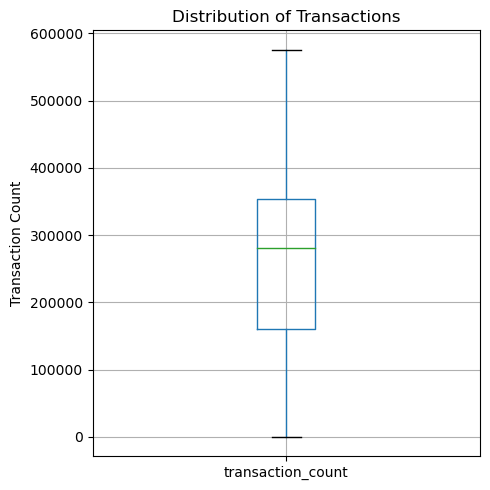

In [30]:
grouped_transaction = data_customer_location.groupby(['store_id', 'customer_state']).agg({'transaction_count': 'sum'}).reset_index()
plt.figure(figsize=(5,5))
grouped_transaction.boxplot(column='transaction_count')
print(grouped_transaction)
plt.title('Distribution of Transactions')
plt.xlabel('')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.savefig('9.pdf')

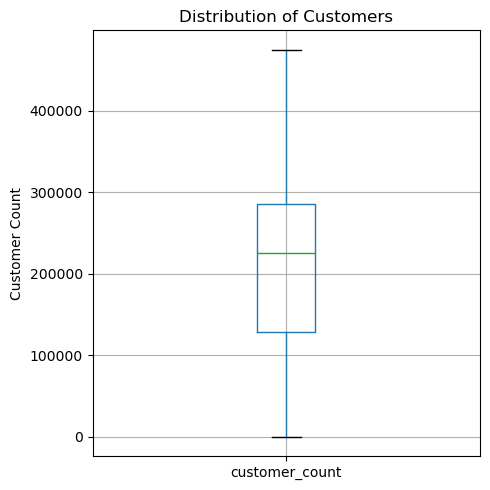

In [31]:
grouped_customer = data_customer_location.groupby(['store_id', 'customer_state']).agg({'customer_count': 'sum'}).reset_index()
plt.figure(figsize=(5,5))
grouped_customer.boxplot(column='customer_count')
plt.title('Distribution of Customers')
plt.xlabel('')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.savefig('10.pdf')

In [ ]:
#### 描述 KDE (Kernel Density Estimation) 的分布，通常需要关注以下几个方面： 中心位置：这通常指的是分布的中位数或平均值。对于 KDE，你可以通过观察曲线的最高点来初步确定数据的中心位置。  形态和对称性：观察 KDE 曲线是否呈对称形状。如果不对称，那么曲线是偏左的还是偏右的？偏左意味着尾部在左边，大部分数据点分布在右边，反之亦然。峰值：单峰：如果 KDE 曲线有一个明显的高点，那么这个分布可以被描述为单峰的。多峰：如果有两个或更多的高点，那么这是一个多峰分布。你应该描述每个峰的位置和相对高度。分散度：观察数据的扩散或范围。宽的 KDE 曲线意味着数据有较大的扩散，而狭窄的曲线意味着数据较为集中。异常值和尾部：观察 KDE 的尾部是否有长尾，以及是否有任何明显的异常点或离群点。平滑度：记住，KDE 的平滑度是可以调整的（通过调整带宽）。一个非常平滑的 KDE 可能会掩盖数据中的一些细节，而一个较不平滑的 KDE 可能会过多地强调噪声。当描述 KDE 时，结合原始数据和其他统计方法（如五数概括、箱线图等）可以提供更全面的数据描述。

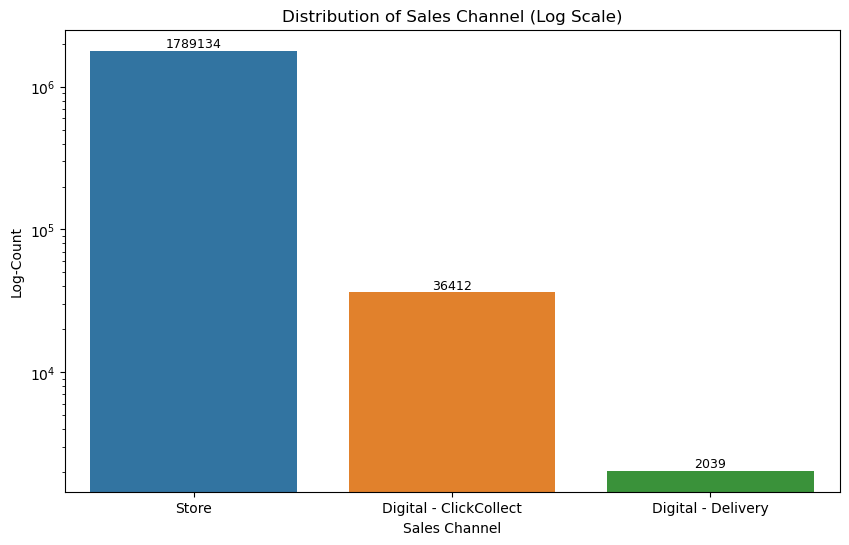

In [6]:
sales_channel_counts = data_customer_location['sales_channel'].value_counts()
customer_state_counts = data_customer_location['customer_state'].value_counts()

plt.figure(figsize=(10,6))
ax1 = sns.countplot(data=data_customer_location, x='sales_channel')
plt.yscale("log")
plt.title('Distribution of Sales Channel (Log Scale)')
plt.ylabel('Log-Count')
plt.xlabel('Sales Channel')

for i, v in enumerate(sales_channel_counts):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=9)
    
plt.savefig('1.jpg')


In [ ]:
####  数量对比: 观察不同类别之间的频数对比，哪个类别最多，哪个最少？分布: 您可以描述数据的分布情况。例如，是否所有的类别频数都相近，或者某几个类别明显高于其他类别。异常值/离群值: 在某些情况下，可能会注意到某些类别的频数异常地高或低。这可能是一个值得进一步探索的领域，因为它可能表示某种模式或数据的问题。数据的实际意义: 将数据的数量转化为其实际意义。例如，如果某个销售渠道的销售量特别高，这可能意味着公司应该投入更多资源来进一步开发这个渠道。对数刻度的考虑: 当使用对数刻度时，要注意的是条形图显示的是数量的对数变化而不是实际数量。这在数据的数量级相差很大时是很有用的，但要小心解释。


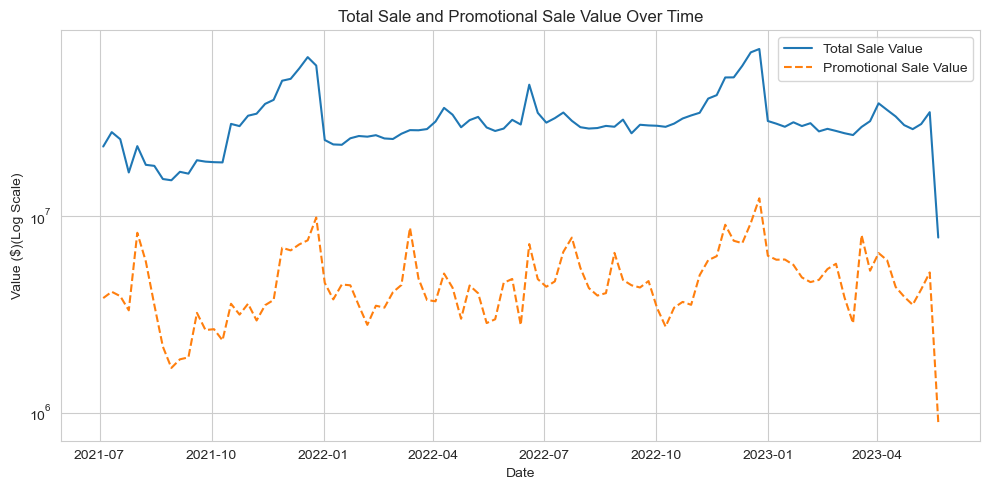

In [33]:
data_customer_location['financial_week_end_date'] = pd.to_datetime(data_customer_location['financial_week_end_date'])

grouped_total_sale = data_customer_location.groupby('financial_week_end_date').agg({'total_sale_value': 'sum'}).reset_index()
grouped_sorted_total_sale = grouped_total_sale.sort_values(by='financial_week_end_date')

grouped_promo_sale = data_customer_location.groupby('financial_week_end_date').agg({'total_promotional_sales_value': 'sum'}).reset_index()
grouped_sorted_promo_sale = grouped_promo_sale.sort_values(by='financial_week_end_date')

plt.figure(figsize=(10,5))
plt.plot(grouped_sorted_total_sale['financial_week_end_date'], grouped_sorted_total_sale['total_sale_value'], label='Total Sale Value')
plt.plot(grouped_sorted_promo_sale['financial_week_end_date'], grouped_sorted_promo_sale['total_promotional_sales_value'], label='Promotional Sale Value', linestyle='--')
plt.title('Total Sale and Promotional Sale Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value ($)(Log Scale)')
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('13.pdf')


In [34]:
# data_customer_location['financial_week_end_date'] = pd.to_datetime(data_customer_location['financial_week_end_date'])
# grouped = data_customer_location.groupby('financial_week_end_date').agg({'total_promotional_sales_value': 'sum'}).reset_index()
# grouped_sorted = grouped.sort_values(by='financial_week_end_date')

# plt.figure(figsize=(10,5))
# plt.plot(grouped_sorted['financial_week_end_date'], grouped_sorted['total_promotional_sales_value'])
# plt.title('Total Promotion Sale Value Over Time')
# plt.xlabel('Date')
# plt.ylabel('Total Sale Value')
# plt.yscale("log")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
#### 可以看到对于总的销售来说，在年中和年末的时候销售量比较多，但是还不足以说明promotion和总销售的关系，在promotion的图里无法看出和时间的关系，好像每个月的都有promotion.

In [35]:
# plt.figure(figsize=(5,5))
# plt.scatter(data_customer_location['total_promotional_sales_value'], data_customer_location['total_sale_value'], alpha=0.1)
# plt.title('Relationship between Promotional Sales Value and Total Sale Value')
# plt.xlabel('Total Promotional Sales Value')
# plt.ylabel('Total Sale Value')
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# correlation = data_customer_location['total_promotional_sales_value'].corr(data_customer_location['total_sale_value'])
# print(f"Correlation between Promotional Sales Value and Total Sale Value: {correlation:.2f}")

count    1.827517e+06
mean     1.577604e-01
std      1.341988e-01
min      0.000000e+00
25%      8.407977e-02
50%      1.330001e-01
75%      1.967767e-01
max      2.171018e+01
Name: promo_to_total_ratio, dtype: float64


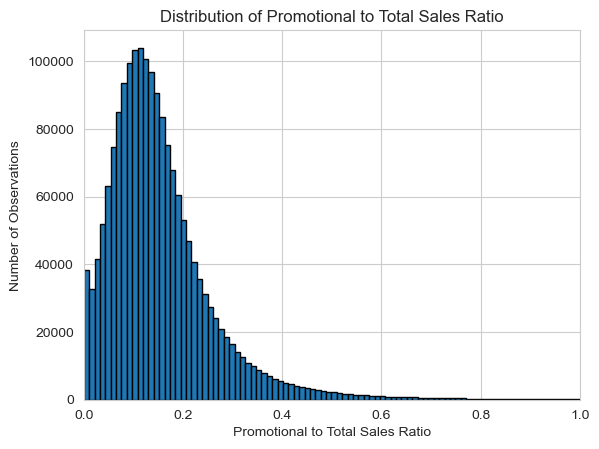

In [36]:
data_customer_location['promo_to_total_ratio'] = data_customer_location['total_promotional_sales_value'] / data_customer_location['total_sale_value']
print(data_customer_location['promo_to_total_ratio'].describe())
plt.hist(data_customer_location['promo_to_total_ratio'], bins=2000, edgecolor='k')
plt.xlabel('Promotional to Total Sales Ratio')
plt.xlim([0, 1])
plt.ylabel('Number of Observations')
plt.title('Distribution of Promotional to Total Sales Ratio')
plt.savefig('14.pdf')

In [37]:
# data_customer_location.groupby('financial_week_end_date')['promo_to_total_ratio'].mean().plot()
# plt.ylabel('Average Promo to Total Sales Ratio')
# plt.title('Time Trend of Promotional to Total Sales Ratio')
# plt.show()


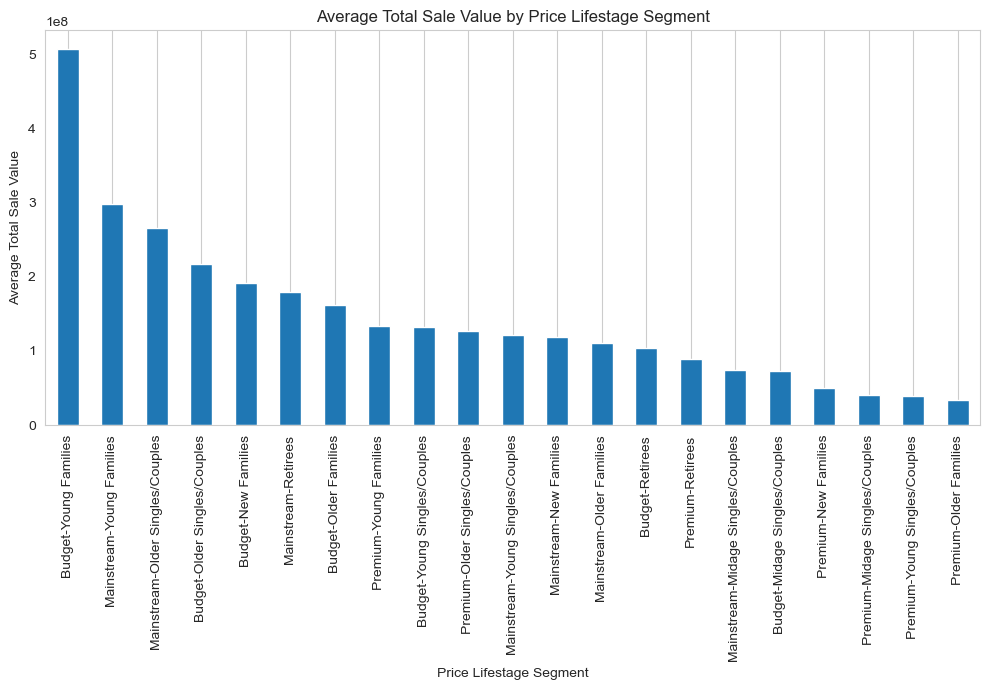

In [38]:
grouped = data_customer_location.groupby('price_lifestage_segment')['total_sale_value'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,7))
grouped.plot(kind='bar')
plt.title('Average Total Sale Value by Price Lifestage Segment')
plt.ylabel('Average Total Sale Value')
plt.xlabel('Price Lifestage Segment')
plt.xticks(rotation=90, fontsize=10) 
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('15.pdf')

In [39]:
dummies['Store_Delivery_Interaction'] =  dummies['sales_channel_Store'] * dummies['sales_channel_Digital - Delivery']
dummies['interaction_transaction_customer'] = dummies['transaction_count'] * dummies['customer_count']

X = dummies[['sales_channel_Store', 'sales_channel_Digital - Delivery','Store_Delivery_Interaction','customer_count', 'transaction_count', 'interaction_transaction_customer']]
X = sm.add_constant(X)  # adding a constant
y = dummies['total_sale_value']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_sale_value   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 4.395e+06
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:27:32   Log-Likelihood:            -1.4758e+07
No. Observations:             1827585   AIC:                         2.952e+07
Df Residuals:                 1827579   BIC:                         2.952e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
## Store 的数据库


In [40]:
# sns.set(style="whitegrid")

# plt.figure(figsize=(5, 10))

# plt.subplot(3, 1, 1)
# sns.histplot(data_store_location['store_state'], kde=True, bins=1000)
# plt.title('Distribution of Store State')
# plt.xlabel('State')
# plt.ylabel('Frequency')

# plt.subplot(3, 1, 2)
# sns.histplot(data_store_location['distance_to_kmart'], kde=True, bins=1000)
# plt.title('Distribution of Distance to Kmart')
# plt.xlabel('Distance to Target')
# plt.ylabel('Frequency')

# plt.subplot(3, 1, 3)
# sns.histplot(data_store_location['distance_to_target'], kde=True, bins=1000)
# plt.title('Distribution of Distance to Target')
# plt.xlabel('Distance to Target')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [41]:
# sns.set_style("whitegrid")

# sales_channel_counts = data_store_location['sales_channel'].value_counts()
# store_state_counts = data_store_location['store_state'].value_counts()

# plt.figure(figsize=(5,5))
# ax3 = sns.countplot(data=data_store_location, x='sales_channel')
# plt.title('Distribution of Sales Channel (Log Scale)')
# plt.ylabel('Count')
# plt.xlabel('Sales Channel')

# for i, v in enumerate(sales_channel_counts):
#     ax3.text(i, v , str(v), ha='center', va='bottom', fontsize=9)
    
# plt.show()

# plt.figure(figsize=(5,5))
# ax4 = sns.countplot(data = data_store_location, x='store_state', order = data_store_location['store_state'].value_counts().index) 
# plt.title('Distribution of Store State')
# plt.ylabel('Count')
# plt.xlabel('Store State')

# for i, v in enumerate(store_state_counts):
#     ax4.text(i, v, str(v), ha='center', va='bottom', fontsize=9)
# plt.show()



<Figure size 1200x600 with 0 Axes>

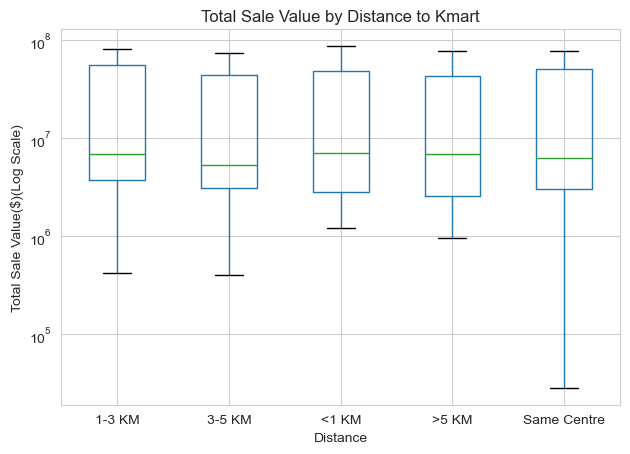

<Figure size 1200x600 with 0 Axes>

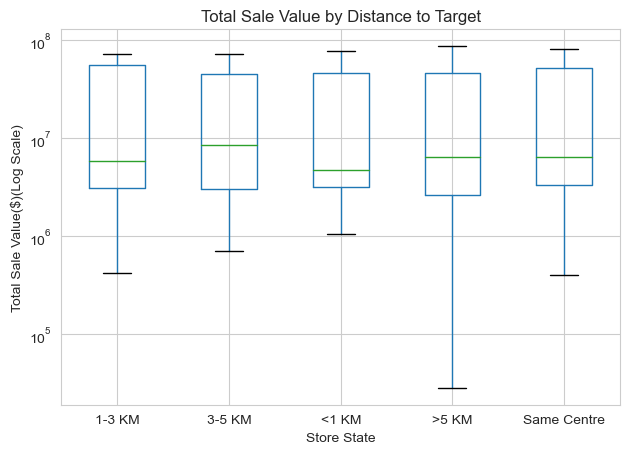

In [42]:
plt.figure(figsize=(12,6))
data_store_location.boxplot(column='total_sale_value', by='distance_to_kmart')
plt.title('Total Sale Value by Distance to Kmart')
plt.suptitle('') # remove automatic title
plt.xlabel('Distance')
plt.ylabel('Total Sale Value($)(Log Scale)')
plt.yscale("log")
plt.tight_layout()
plt.savefig('16.pdf')

plt.figure(figsize=(12,6))
data_store_location.boxplot(column='total_sale_value', by='distance_to_target')
plt.title('Total Sale Value by Distance to Target')
plt.suptitle('') # remove automatic title
plt.xlabel('Store State')
plt.ylabel('Total Sale Value($)(Log Scale)')
plt.yscale("log")
plt.tight_layout()
plt.savefig('17.pdf')


In [43]:
# grouped_data = data_store_location.groupby(['store_id', 'sales_channel']).agg({'total_sale_value': 'sum'}).reset_index()

# # 创建箱线图
# plt.figure(figsize=(12,6))
# grouped_data.boxplot(column='total_sale_value', by='sales_channel')
# plt.title('Total Sale Value by Sales Channel')
# plt.suptitle('') # remove automatic title
# plt.xlabel('Sales Channel')
# plt.ylabel('Total Sale Value')
# plt.yscale("log")
# plt.tight_layout()
# plt.show()

# grouped_data = data_store_location.groupby(['store_state', 'sales_channel']).agg({'total_sale_value': 'sum'}).reset_index()

# plt.figure(figsize=(12,6))
# grouped_data.boxplot(column='total_sale_value', by='store_state')
# plt.title('Total Sale Value by Store State')
# plt.suptitle('') 
# plt.xlabel('Store State')
# plt.ylabel('Total Sale Value')
# plt.yscale("log")
# plt.tight_layout()
# plt.show()


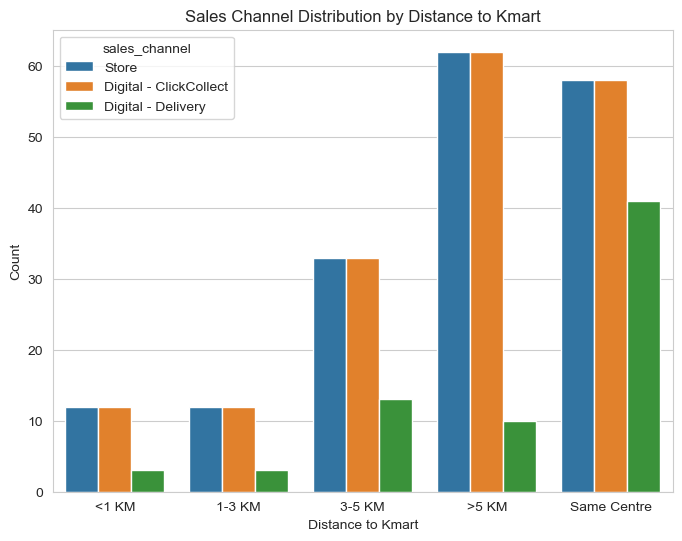

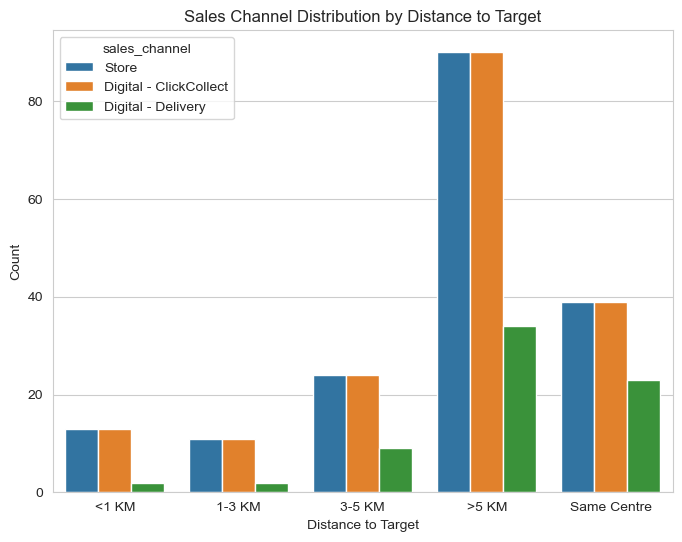

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_store_location, x='distance_to_kmart', hue='sales_channel', order=["<1 KM", "1-3 KM", "3-5 KM", ">5 KM",'Same Centre'])
plt.title('Sales Channel Distribution by Distance to Kmart')
plt.xlabel('Distance to Kmart')
plt.ylabel('Count')
plt.savefig('18.pdf')

# Target distance vs. sales channel distribution
plt.figure(figsize=(8,6))
sns.countplot(data=data_store_location, x='distance_to_target', hue='sales_channel', order=["<1 KM", "1-3 KM", "3-5 KM", '>5 KM','Same Centre'])
plt.title('Sales Channel Distribution by Distance to Target')
plt.xlabel('Distance to Target')
plt.ylabel('Count')
plt.savefig('19.pdf')

In [45]:
dummies1['5km_Interaction'] = dummies1['distance_to_kmart_>5 KM'] * dummies1['distance_to_target_>5 KM']
dummies1['samecentre_Interaction'] = dummies1['distance_to_target_Same Centre'] * dummies1['distance_to_kmart_Same Centre']

X = dummies1[['samecentre_Interaction','5km_Interaction','store_state_NSW','store_state_QLD', 'sales_channel_Store', 'sales_channel_Digital - Delivery','distance_to_kmart_3-5 KM','distance_to_kmart_<1 KM','distance_to_kmart_>5 KM','distance_to_kmart_Same Centre','distance_to_target_3-5 KM','distance_to_target_<1 KM','distance_to_target_>5 KM','distance_to_target_Same Centre']]
X = sm.add_constant(X)  # adding a constant
y = dummies1['total_sale_value']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_sale_value   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     261.9
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          3.98e-194
Time:                        18:27:33   Log-Likelihood:                -7329.0
No. Observations:                 424   AIC:                         1.469e+04
Df Residuals:                     409   BIC:                         1.475e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

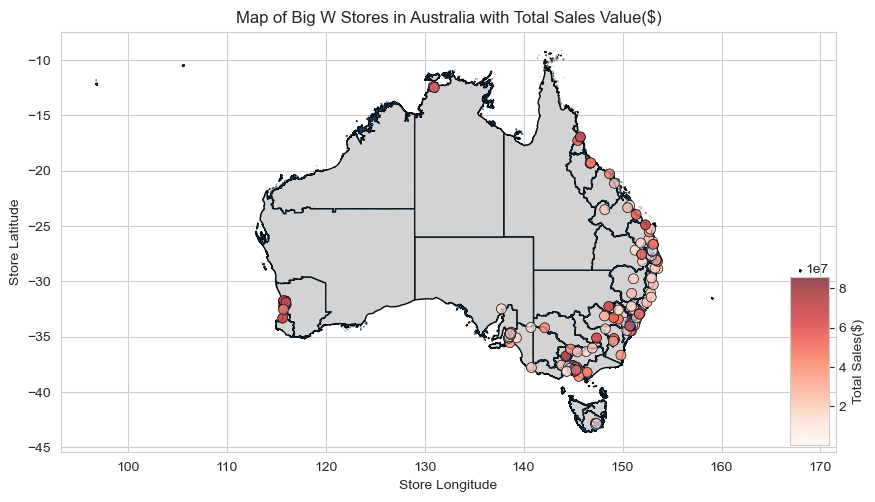

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

australia = gpd.read_file('/Users/ganzhongyu/Desktop/悉尼大学/S2/6860/7/SA4_2021_AUST_SHP_GDA2020')

geom = [Point(xy) for xy in zip(pd.DataFrame(data_store_location)['store_longitude'], pd.DataFrame(data_store_location)['store_latitude'])]
stores_gdf = gpd.GeoDataFrame(data_store_location, geometry=geom)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
australia.boundary.plot(ax=ax, linewidth=0.2, alpha=0.4)

australia.plot(ax=ax, color='lightgray', edgecolor='black')

scatter_plot = ax.scatter(stores_gdf.geometry.x, stores_gdf.geometry.y, 
                          c=stores_gdf['total_sale_value'], cmap='Reds', 
                          s=50, edgecolor='k', linewidths=0.5, alpha=0.7)

axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="40%",  # height : 40% of parent_bbox height
                   loc='lower right')

cbar = plt.colorbar(scatter_plot, cax=axins)
cbar.set_label('Total Sales($)')

ax.set_title("Map of Big W Stores in Australia with Total Sales Value($)")
ax.set_xlabel('Store Longitude')
ax.set_ylabel('Store Latitude')
plt.savefig('20.pdf')


